In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Train.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
import os
from PIL import Image

In [ ]:
# train_datagen = ImageDataGenerator(rescale=1./255,
#                                    horizontal_flip=True,
#                                    vertical_flip=True)

In [ ]:
# input_images_train=tf.keras.preprocessing.image_dataset_from_directory(
#     '/content/Train/low',
#     labels=None,
#     label_mode=None,
#     class_names=None,
#     color_mode='rgb',
#     batch_size=256,
#     image_size=(256, 256),
#     shuffle=False,
#     seed=None,
#     validation_split=0.2,
#     subset='training',
#     interpolation='bilinear',
#     follow_links=False,

# )

Found 485 files belonging to 1 classes.
Using 388 files for training.


In [ ]:
# type(input_images_train)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [ ]:
# output_images_train=tf.keras.preprocessing.image_dataset_from_directory(
#     '/content/Train/high',
#     labels=None,
#     label_mode=None,
#     class_names=None,
#     color_mode='rgb',
#     batch_size=256,
#     image_size=(256, 256),
#     rescale = 1./255,
#     shuffle=False,
#     seed=None,
#     validation_split=0.2,
#     subset='training',
#     interpolation='bilinear',
#     follow_links=False,

# )

Found 485 files belonging to 1 classes.
Using 388 files for training.


In [ ]:
# num_images_to_take = 3

# input_images_train = input_images_train.take(num_images_to_take)
# output_images_train = output_images_train.take(num_images_to_take)

In [ ]:
# combined_dataset = tf.data.Dataset.zip((input_images_train, output_images_train))

## Load the Dataset

In [6]:
image_files = [os.path.join('/content/Train/high', f) for f in os.listdir('/content/Train/high') if f.endswith(('png', 'jpg', 'jpeg'))]
print(f"Found {len(image_files)} images.")


Found 485 images.


In [7]:
y_img = []
for file in image_files:
    img = Image.open(file)
    img = img.resize((256,256))  # Resize images if necessary
    img_array = np.array(img)
    y_img.append(img_array)

y_img = np.array(y_img)

In [8]:
y_img.shape

(485, 256, 256, 3)

In [9]:
low_image_files = [os.path.join('/content/Train/low', f) for f in os.listdir('/content/Train/low') if f.endswith(('png', 'jpg', 'jpeg'))]
print(f"Found {len(image_files)} images.")

Found 485 images.


In [10]:
x_img = []
for file in low_image_files:
    img = Image.open(file)
    img = img.resize((256,256))  # Resize images if necessary
    img_array = np.array(img)
    x_img.append(img_array)

x_img = np.array(x_img)

In [11]:
x_img.shape

(485, 256, 256, 3)

In [12]:
# normalize the image data
x_img = x_img.astype('float32') / 255
y_img = y_img.astype('float32') / 255

## Exploratory Data Analysis

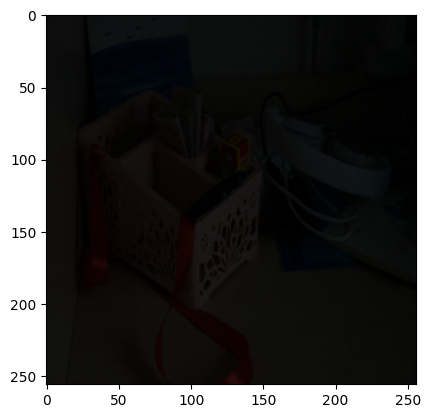

In [13]:
# randomly select input image
index = np.random.randint(len(x_img))
# plot the image
plt.imshow(x_img[index])
# plt.gray()

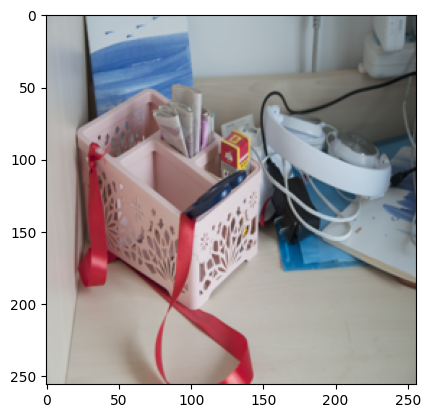

In [14]:
plt.imshow(y_img[index])

## Model Creation

In [15]:
model = Sequential([
                    # encoder network
                    Conv2D(256, 3, activation='relu', padding='same', input_shape=(256, 256, 3)),
                    # MaxPooling2D(2, padding='same'),
                    Conv2D(64, 3, activation='relu', padding='same'),
                    # MaxPooling2D(2, padding='same'),
                    # decoder network
                    Conv2D(64, 3, activation='relu', padding='same'),
                    # UpSampling2D(2),
                    Conv2D(256, 3, activation='relu', padding='same'),
                    # UpSampling2D(2),
                    # output layer
                    Conv2D(3, 3, activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 256)     7168      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      147520    
                                                                 
 conv2d_2 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 256, 256, 256)     147712    
                                                                 
 conv2d_4 (Conv2D)           (None, 256, 256, 3)       6915      
                                                                 
Total params: 346243 (1.32 MB)
Trainable params: 346243 (1.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
import sklearn
from sklearn.model_selection import train_test_split

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x_img, y_img, test_size=0.17, random_state=42)

In [18]:
# train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=16,validation_data=(x_test,y_test))

Epoch 1/20
26/26 [==============================] - 44s 691ms/step - loss: 0.0369 - val_loss: 0.0395
Epoch 2/20
26/26 [==============================] - 12s 455ms/step - loss: 0.0319 - val_loss: 0.0250
Epoch 3/20
26/26 [==============================] - 12s 455ms/step - loss: 0.0291 - val_loss: 0.0233
Epoch 4/20
26/26 [==============================] - 12s 458ms/step - loss: 0.0286 - val_loss: 0.0226
Epoch 5/20
26/26 [==============================] - 12s 460ms/step - loss: 0.0286 - val_loss: 0.0262
Epoch 6/20
26/26 [==============================] - 12s 463ms/step - loss: 0.0266 - val_loss: 0.0200
Epoch 7/20
26/26 [==============================] - 13s 485ms/step - loss: 0.0264 - val_loss: 0.0219
Epoch 8/20
26/26 [==============================] - 12s 469ms/step - loss: 0.0261 - val_loss: 0.0211
Epoch 9/20
26/26 [==============================] - 13s 493ms/step - loss: 0.0254 - val_loss: 0.0244
Epoch 10/20
26/26 [==============================] - 12s 472ms/step - loss: 0.0274 - val_lo

## Visualize the Results

In [23]:
# predict the results from model (get compressed images)
index = np.random.randint(len(x_test))
pred = model.predict(x_test[index].reshape(1,256,256,3))

1/1 [==============================] - 0s 19ms/step


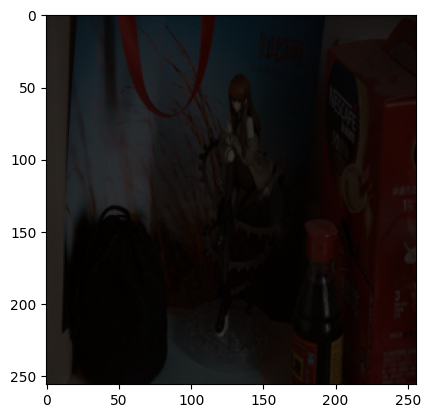

In [24]:
# randomly select input image
# index = np.random.randint(len(x_test))
# # plot the image
plt.imshow(x_test[index].reshape(256,256,3))
# plt.gray()

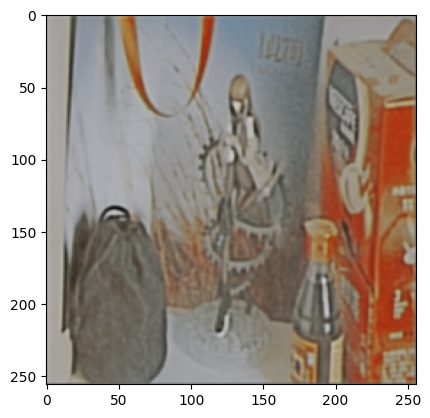

In [25]:
# visualize compressed image
plt.imshow(pred[0].reshape(256,256,3))
# plt.gray()

In [57]:
psnr=0
for i in range(len(x_train)):
  pred = model.predict(x_train[i].reshape(1,256,256,3))
  m = np.mean((y_train[i]-pred)**2)
  psnr += 5*np.log10(255/m)

1/1 [==============================] - 0s 24ms/step


In [58]:
(psnr)/len(x_train)

20.724145179137448

In [59]:
psnr1=0
for i in range(len(x_test)):
  pred = model.predict(x_test[i].reshape(1,256,256,3))
  m = np.mean((y_test[i]-pred)**2)
  psnr1 += 5*np.log10((255)/(m))

1/1 [==============================] - 0s 17ms/step


In [60]:
(psnr)/len(x_test)

21.02949689174031

In [ ]:
import numpy as np

def calculate_psnr(original_image, enhanced_image):

   # Ensure the input images are in the correct format and dimensions
    original_image = np.array(original_image, dtype=np.float32)
    enhanced_image = np.array(enhanced_image, dtype=np.float32)

    if original_image.shape != enhanced_image.shape:
        raise ValueError("Input images must have the same dimensions and channels")

    # Compute the Mean Squared Error (MSE)
    mse = np.mean((original_image - enhanced_image) ** 2)

    if mse == 0:
        return float('inf')  # If the MSE is zero, the PSNR is infinite

    # Set the maximum pixel value
    max_pixel_value = 255.0

    # Compute the PSNR
    psnr = 20 * np.log10(max_pixel_value / np.sqrt(mse))

    return psnr

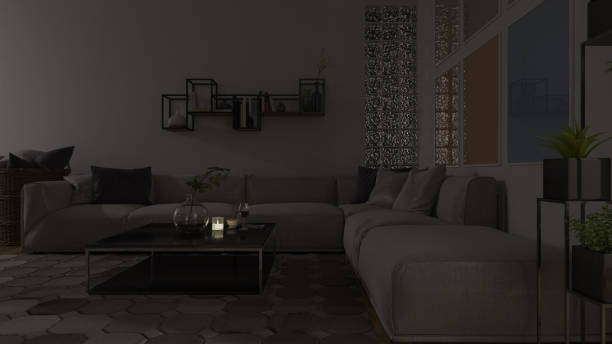

In [ ]:
img = Image.open('/content/low4.jpg')
img

In [ ]:
 img = img.resize((256,256))

In [ ]:
img = np.array(img)
img = img.astype('float32') / 255
img.shape

(256, 256, 3)

In [ ]:
out = model.predict(img.reshape(1,256,256,3))

1/1 [==============================] - 0s 24ms/step


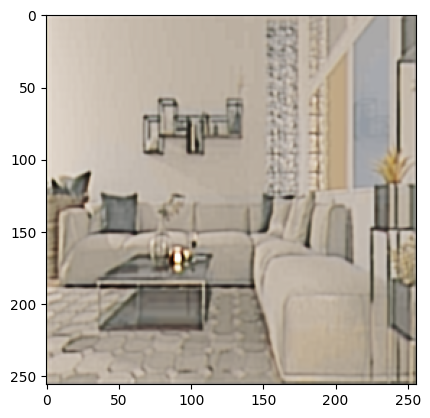

In [ ]:
plt.imshow(out.reshape(256,256,3))

In [ ]:
out = out.reshape(256,256,3)

In [ ]:
import cv2

In [ ]:
sharpen_img = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])

In [ ]:
fin_out = np.zeros((256,256,3))

In [ ]:
fin_out[:,:,0] = cv2.filter2D(out[:,:,0],-1,sharpen_img)
fin_out[:,:,1] = cv2.filter2D(out[:,:,1],-1,sharpen_img)
fin_out[:,:,2]= cv2.filter2D(out[:,:,2],-1,sharpen_img)

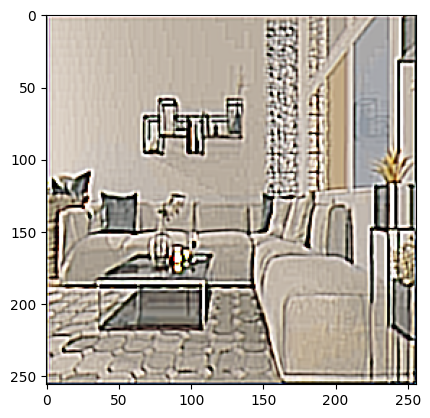

In [ ]:
plt.imshow(fin_out)

In [ ]:
history.history['loss'][19]

0.02236602082848549

In [ ]:
vlg = np.log10(255**2/history.history['loss'][19])
vlg

6.463491635866026